In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [4]:
# Re-implement ScaleFreeTopology for testing
import random
from typing import Dict, List

class ScaleFreeTopology:
    def __init__(self, size: int, m0: int, m: int, create_object_method=None):
        self.size = size
        self.m0 = m0
        self.m = m
        self.create_object_method = (lambda i: i) if create_object_method is None else create_object_method

    def create(self) -> Dict[int, List]:
        adj = {i: set() for i in range(self.size)}
        # Initial complete graph
        for u in range(self.m0):
            for v in range(u+1, self.m0):
                adj[u].add(v)
                adj[v].add(u)
        # Preferential attachment
        for i in range(self.m0, self.size):
            existing = list(range(i))
            degrees = [len(adj[j]) for j in existing]
            total_degree = sum(degrees)
            targets = set()
            while len(targets) < self.m:
                r = random.random() * total_degree
                cum = 0.0
                for j, deg in zip(existing, degrees):
                    cum += deg
                    if r < cum:
                        targets.add(j)
                        break
            for j in targets:
                adj[i].add(j)
                adj[j].add(i)
        # Convert adjacency sets to lists
        return {self.create_object_method(i): sorted(adj[i]) for i in range(self.size)}


In [28]:
# Parameters for testing
size = 1000
m0 = 10
m = 3

# Generate topology and build a NetworkX graph
topo = ScaleFreeTopology(size=size, m0=m0, m=m)
adjacency = topo.create()
G = nx.Graph()
for u, nbrs in adjacency.items():
    for v in nbrs:
        G.add_edge(u, v)

In [29]:
# 1. Check for self-loops
selfloops = list(nx.selfloop_edges(G))
print("Number of self-loops:", len(selfloops))

# 2. Check for isolated nodes
isolates = list(nx.isolates(G))
print("Number of isolated nodes:", len(isolates))

Number of self-loops: 0
Number of isolated nodes: 0


In [ ]:
# 3. Degree distribution
deg_seq = [d for _, d in G.degree() if d > 0]
deg_count = Counter(deg_seq)
degrees, freqs = zip(*sorted(deg_count.items()))

# Display distribution as a DataFrame
df = pd.DataFrame({"degree": degrees, "frequency": freqs})
print(df)


    degree  frequency
0        3        395
1        4        203
2        5        130
3        6         64
4        7         35
5        8         35
6        9         26
7       10         14
8       11         14
9       12         12
10      13          6
11      14          9
12      15          8
13      16          6
14      17          3
15      18          5
16      19          7
17      20          1
18      21          4
19      22          2
20      23          2
21      25          2
22      27          1
23      35          1
24      38          1
25      39          1
26      40          1
27      42          2
28      44          1
29      46          1
30      54          1
31      55          1
32      56          1
33      60          1
34      64          1
35      68          1
36      74          1
37      80          1


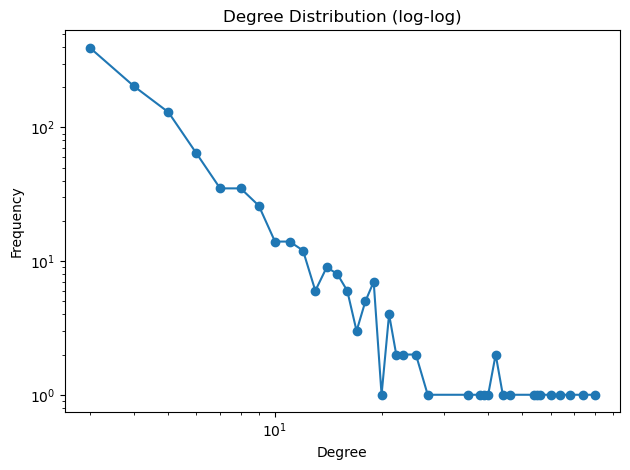

In [37]:
# 4. Plot degree distribution on log-log scale
plt.figure()
plt.loglog(degrees, freqs, marker='o')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution (log-log)")
plt.tight_layout()
plt.show()

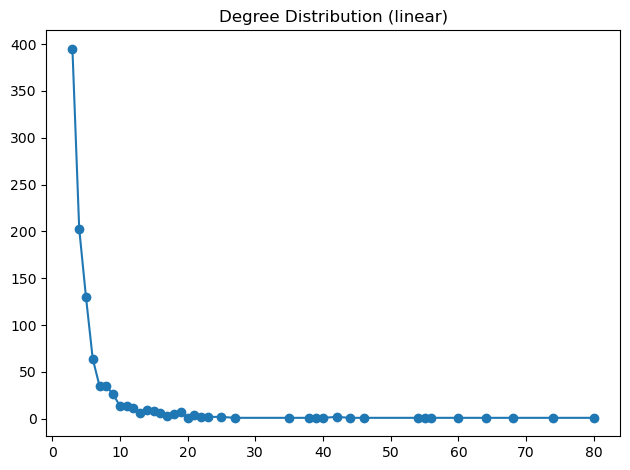

In [39]:
# 5. Plot degree distribution on linear scale
plt.figure()
plt.plot(degrees, freqs, marker='o')
plt.title("Degree Distribution (linear)")
plt.tight_layout()
plt.show()